In [1]:
import numpy as np 
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl

# With Loss of Binary Logistic Regression

In [2]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Caltech36', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [3]:
'''
Here you can try my updated sndl_equalEdge function to get a balanced sample_size_list automatically by 
just setting the parameter base_sample_size (the samplesize for the first graph).
'''

# sample_size_list = [500, 500]
W, beta, H = sndl_equalEdge(graph_list, base_sample_size=600, k=25, xi=5, n_components=16, iter = 150,
                            if_validate=True, if_compute_recons_error=True)

num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
 !!! The balanced size_list: [600, 1273]
num of subgraphs induced on k-paths: 600
num of subgraphs induced on k-paths: 1273
initial loading beta [[ 0.29834164  0.99522583  0.07862051  0.85939759  0.27715297  0.96921088
  -0.64778698 -0.44460351 -0.3561026   0.14927781  0.22068872  0.9867944
  -0.68133489  0.70367553  0.60808074  0.52492664  0.50387708]]


  1%|▏         | 2/150 [00:00<00:08, 18.12it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.791), np.float64(0.996)]
--- Iteration 0: Training loss --- [Data, Label, Total] = [143532.863877.3, 135.628935.3, 717799.948319.3]


  7%|▋         | 10/150 [00:00<00:04, 31.58it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.81), np.float64(0.996)]
--- Iteration 10: Training loss --- [Data, Label, Total] = [79417.740394.3, 154.532492.3, 397243.234462.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.81), np.float64(0.996)]


 12%|█▏        | 18/150 [00:01<00:12, 10.44it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.81), np.float64(0.996), np.float64(0.966), np.float64(0.974)]
--- Training --- [threshold, AUC] =  [np.float64(0.603), np.float64(0.995)]
--- Iteration 20: Training loss --- [Data, Label, Total] = [71493.378503.3, 158.830180.3, 357625.722696.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.603), np.float64(0.995)]


 17%|█▋        | 25/150 [00:02<00:15,  8.10it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.603), np.float64(0.995), np.float64(0.973), np.float64(0.98)]


 19%|█▉        | 29/150 [00:02<00:11, 10.96it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.603), np.float64(0.995)]
--- Iteration 30: Training loss --- [Data, Label, Total] = [69497.760061.3, 160.272035.3, 347649.072341.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.603), np.float64(0.995)]


 24%|██▍       | 36/150 [00:04<00:14,  8.01it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.603), np.float64(0.995), np.float64(0.973), np.float64(0.98)]


 27%|██▋       | 40/150 [00:04<00:10, 10.65it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.606), np.float64(0.995)]
--- Iteration 40: Training loss --- [Data, Label, Total] = [68729.672283.3, 161.203706.3, 343809.565119.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.606), np.float64(0.995)]


 31%|███▏      | 47/150 [00:05<00:12,  8.00it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.606), np.float64(0.995), np.float64(0.973), np.float64(0.98)]
--- Training --- [threshold, AUC] =  [np.float64(0.581), np.float64(0.995)]
--- Iteration 50: Training loss --- [Data, Label, Total] = [68304.157230.3, 161.804503.3, 341682.590651.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.581), np.float64(0.995)]


 37%|███▋      | 55/150 [00:06<00:12,  7.48it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.581), np.float64(0.995), np.float64(0.974), np.float64(0.981)]


 39%|███▉      | 59/150 [00:07<00:09,  9.84it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.58), np.float64(0.995)]
--- Iteration 60: Training loss --- [Data, Label, Total] = [67995.966154.3, 162.358694.3, 340142.189463.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.58), np.float64(0.995)]


 44%|████▍     | 66/150 [00:08<00:10,  7.85it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.58), np.float64(0.995), np.float64(0.974), np.float64(0.981)]


 46%|████▌     | 69/150 [00:08<00:08,  9.04it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.579), np.float64(0.995)]
--- Iteration 70: Training loss --- [Data, Label, Total] = [67736.545083.3, 162.727007.3, 338845.452422.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.579), np.float64(0.995)]


 51%|█████     | 76/150 [00:09<00:09,  7.55it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.579), np.float64(0.995), np.float64(0.974), np.float64(0.981)]


 53%|█████▎    | 80/150 [00:09<00:06, 10.12it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.579), np.float64(0.995)]
--- Iteration 80: Training loss --- [Data, Label, Total] = [67501.695367.3, 163.025378.3, 337671.502215.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.579), np.float64(0.995)]


 58%|█████▊    | 87/150 [00:11<00:07,  7.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.579), np.float64(0.995), np.float64(0.974), np.float64(0.981)]
--- Training --- [threshold, AUC] =  [np.float64(0.577), np.float64(0.995)]
--- Iteration 90: Training loss --- [Data, Label, Total] = [67281.080362.3, 163.130334.3, 336568.532145.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.577), np.float64(0.995)]


 63%|██████▎   | 95/150 [00:12<00:07,  7.60it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.577), np.float64(0.995), np.float64(0.974), np.float64(0.981)]


 66%|██████▌   | 99/150 [00:12<00:05, 10.06it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.576), np.float64(0.995)]
--- Iteration 100: Training loss --- [Data, Label, Total] = [67069.135058.3, 163.357322.3, 335509.032611.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.576), np.float64(0.995)]


 71%|███████   | 106/150 [00:13<00:05,  8.17it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.576), np.float64(0.995), np.float64(0.974), np.float64(0.981)]


 73%|███████▎  | 110/150 [00:13<00:03, 10.78it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.591), np.float64(0.995)]
--- Iteration 110: Training loss --- [Data, Label, Total] = [66863.133169.3, 163.280784.3, 334478.946631.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.591), np.float64(0.995)]


 78%|███████▊  | 117/150 [00:15<00:03,  8.26it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.591), np.float64(0.995), np.float64(0.973), np.float64(0.98)]
--- Training --- [threshold, AUC] =  [np.float64(0.588), np.float64(0.995)]
--- Iteration 120: Training loss --- [Data, Label, Total] = [66663.178037.3, 163.087709.3, 333478.977894.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.588), np.float64(0.995)]


 83%|████████▎ | 125/150 [00:16<00:03,  7.79it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.588), np.float64(0.995), np.float64(0.973), np.float64(0.98)]


 86%|████████▌ | 129/150 [00:16<00:02, 10.19it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.583), np.float64(0.995)]
--- Iteration 130: Training loss --- [Data, Label, Total] = [66470.306747.3, 163.149088.3, 332514.682821.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.583), np.float64(0.995)]


 88%|████████▊ | 132/150 [00:17<00:02,  6.07it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.583), np.float64(0.995), np.float64(0.973), np.float64(0.98)]


 92%|█████████▏| 138/150 [00:18<00:01,  9.35it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.58), np.float64(0.995)]
--- Iteration 140: Training loss --- [Data, Label, Total] = [66283.489711.3, 163.002416.3, 331580.450971.3]
!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.58), np.float64(0.995)]


 97%|█████████▋| 145/150 [00:19<00:00,  7.98it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.58), np.float64(0.995), np.float64(0.973), np.float64(0.98)]


100%|██████████| 150/150 [00:19<00:00,  7.76it/s]


!!! pred_type filter
--- Training --- [threshold, AUC] =  [np.float64(0.578), np.float64(0.995)]
!!! FINAL [threshold, AUC] =  [np.float64(0.578), np.float64(0.995)]


In [4]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")

print(f"\nThis is beta {beta}")

This is W's shape: (625, 16)
This is beta's shape: (1, 17)
This is H's shape: (16, 1873)

This is beta [[26.48832024  0.9670724   0.2376969  -1.9595916  -1.26415507 -1.4145428
  -0.59861468 -0.09986439 -0.99618067 -0.19096397 -2.3540778  -1.37241273
  -0.72129416 -2.27179095 -1.16032356 -2.38405893 -4.21416766]]


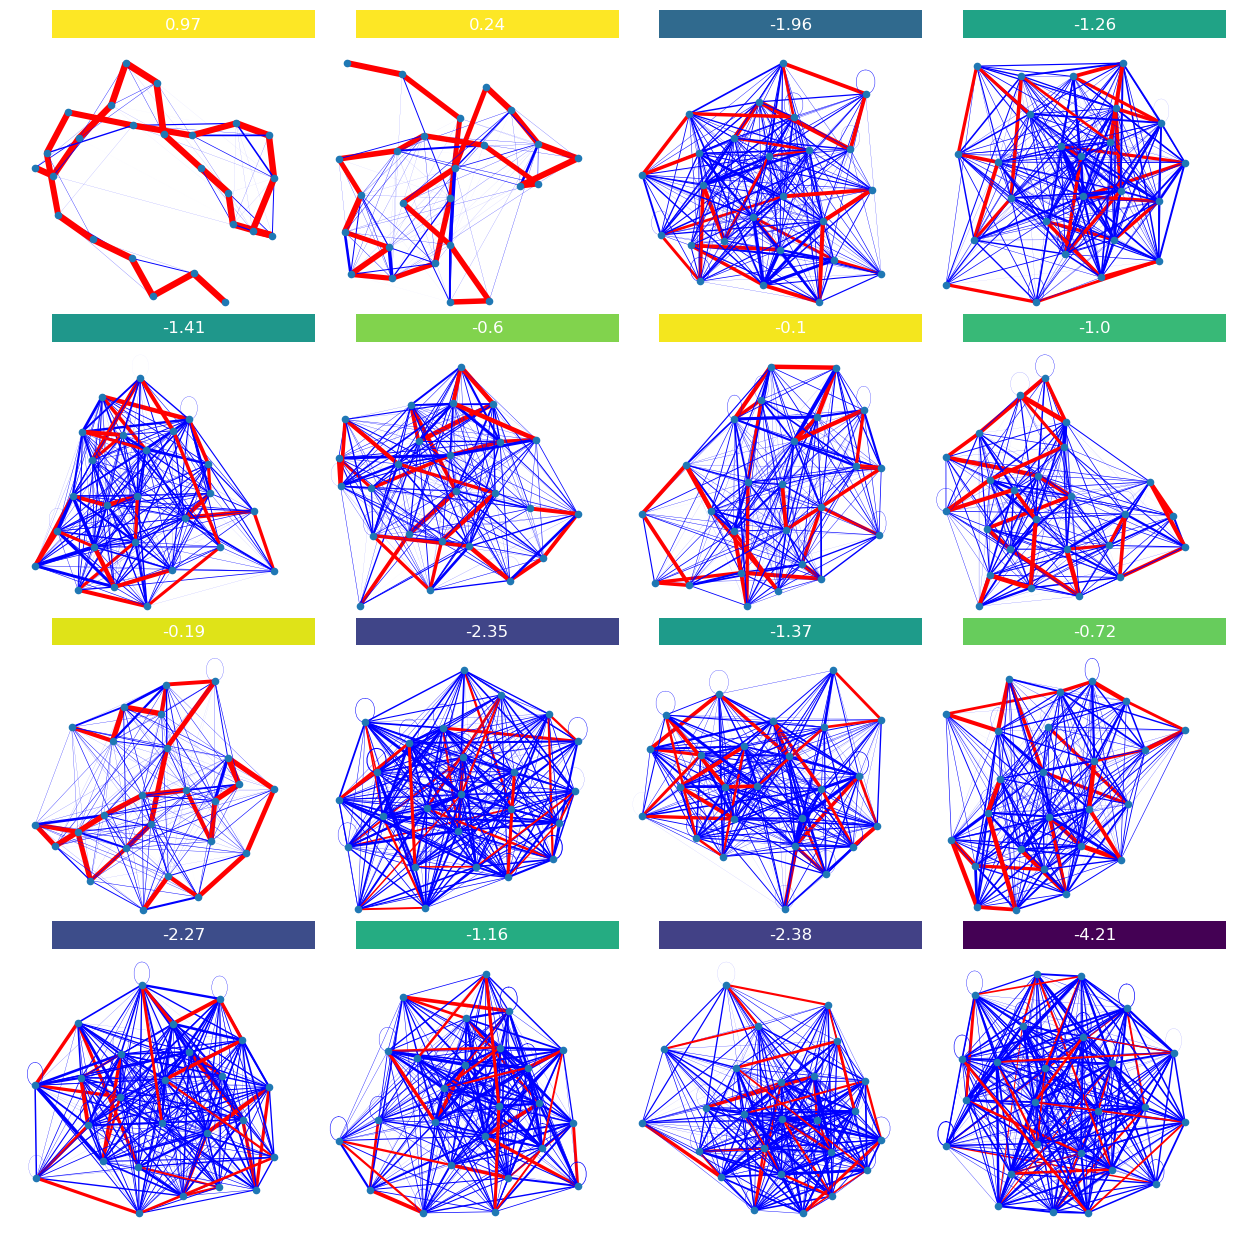

In [5]:
## Visualize dictionaries
display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

In [6]:
b = beta[0, :]
importance = b
idx = np.argsort(importance)
idx = np.flip(idx)

print(b[idx])

[26.48832024  0.9670724   0.2376969  -0.09986439 -0.19096397 -0.59861468
 -0.72129416 -0.99618067 -1.16032356 -1.26415507 -1.37241273 -1.4145428
 -1.9595916  -2.27179095 -2.3540778  -2.38405893 -4.21416766]


In [7]:
### Harvard1, MIT8, Caltech36, UCLA26, 'bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4'
path = "data/" + "MIT8" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob_ = sndl_predict(G3, W, beta, 500)

prob = np.insert(prob_, 0, 1-np.sum(prob_))
print(f"This is the predicted probability distribution: \n{prob}")

This is the predicted probability distribution: 
[0.25324186 0.74675814]


# With Loss of Multiclass Logistic Regression

In [8]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Caltech36', 'UCLA26', 'MIT8', 'Harvard1']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [9]:
# sample_size_list = [500, 500, 500, 500]
W, beta, H = sndl_equalEdge(graph_list, base_sample_size=600, k=25, xi=5, n_components=16, iter = 100,
                            if_validate=True, if_compute_recons_error=True)

'''
Notice the confusion_mx appearing during iterations: It's a 2 by 2 matrix:
[[TN, FP]
 [FN, TP]].
The meaning of it is True Negative, False Positive, False Negative, True Positive respectively, which 
indicates the prediction accuracy of our parameters until the end of that iteration.
And the accuracy report is also derived from this matrix.
'''

num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
num of subgraphs induced on k-paths: 300
 !!! The balanced size_list: [600, 1309, 968, 1163]
num of subgraphs induced on k-paths: 600
num of subgraphs induced on k-paths: 1309
num of subgraphs induced on k-paths: 968
num of subgraphs induced on k-paths: 1163
initial loading beta [[-0.06932625  0.27579157  0.05611627  0.03158243 -0.64584178  0.25748019
  -0.36281529  0.3985819   0.034087    0.40643394 -0.6626805   0.93479802
  -0.53990469 -0.59944376 -0.57332832 -0.58578373 -0.24016676]
 [-0.22984343  0.41913939 -0.30582113 -0.80543585 -0.06432222  0.45414412
   0.25697001  0.58033519  0.09810244  0.38429088  0.44443777  0.38583584
  -0.89962111  0.53127854 -0.22771007  0.60605123 -0.00680064]
 [-0.44416264  0.6151947  -0.32627077  0.80527984 -0.15898004 -0.93870668
  -0.83561242  0.07870052  0.16978694 -0.20741078 -0.33324727 -0.37851144
   0.11677877  0.14931886 -

  1%|          | 1/100 [00:00<00:17,  5.65it/s]

--- Iteration 0: Training loss --- [Data, Label, Total] = [296929.449812.3, 4523853.250853.3, 6008500.499914.3]


 12%|█▏        | 12/100 [00:01<00:10,  8.05it/s]

--- Iteration 10: Training loss --- [Data, Label, Total] = [168882.006377.3, 4120389.252087.3, 4964799.283970.3]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[8171,  509],
       [2569,  871]]), np.float64(0.746)]


 22%|██▏       | 22/100 [00:02<00:11,  6.92it/s]

--- Iteration 20: Training loss --- [Data, Label, Total] = [143571.436431.3, 3387688.897242.3, 4105546.079398.3]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[8193,  487],
       [2547,  893]]), np.float64(0.75)]


 32%|███▏      | 32/100 [00:04<00:10,  6.27it/s]

--- Iteration 30: Training loss --- [Data, Label, Total] = [136884.467235.3, 3546116.836036.3, 4230539.172213.3]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[8186,  494],
       [2534,  906]]), np.float64(0.75)]


 41%|████      | 41/100 [00:05<00:10,  5.63it/s]

--- Iteration 40: Training loss --- [Data, Label, Total] = [134424.050162.3, 3061164.942292.3, 3733285.193103.3]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[8199,  481],
       [2533,  907]]), np.float64(0.751)]


 52%|█████▏    | 52/100 [00:07<00:07,  6.25it/s]

--- Iteration 50: Training loss --- [Data, Label, Total] = [133221.745086.3, 3068169.367787.3, 3734278.093219.3]
!!! pred_type filter
!!! --- Validation --- [confusion_mx, Accuracy] =  [array([[8181,  499],
       [2509,  931]]), np.float64(0.752)]


 60%|██████    | 60/100 [00:08<00:05,  6.73it/s]


--- Iteration 60: Training loss --- [Data, Label, Total] = [132483.599563.3, 3506508.633036.3, 4168926.630852.3]
Early stopping: training loss increased
!!! pred_type filter
!!! FINAL [confusion_mx, Accuracy] =  [array([[8186,  494],
       [2508,  932]]), np.float64(0.752)]


"\nNotice the confusion_mx appearing during iterations: It's a 2 by 2 matrix:\n[[TN, FP]\n [FN, TP]].\nThe meaning of it is True Negative, False Positive, False Negative, True Positive respectively, which \nindicates the prediction accuracy of our parameters until the end of that iteration.\nAnd the accuracy report is also derived from this matrix.\n"

In [10]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")

print(f"\nThis is beta {beta}")

This is W's shape: (625, 16)
This is beta's shape: (3, 17)
This is H's shape: (16, 4040)

This is beta [[ 9.56976573  3.7406462   2.24245342 -0.19782258  4.56958554  2.62320792
  -3.66060608 -4.95081927  0.57789384 -1.31658374 -3.99828419 -2.67099712
   1.04075506 -7.84406103 -2.19075262  2.59958704 -5.81841887]
 [13.34294747  0.95517372  1.34605758 -1.36557928  1.76599244  1.20323806
  -1.576558   -1.66300707 -1.46070938 -0.32498473 -1.28754986 -2.26809195
  -1.20589388 -2.96300713 -1.43746362  1.8964917  -2.28018009]
 [33.27323059 -0.4550033  -1.5435655  -1.89395041  0.39433921 -0.26966741
  -0.81008041 -1.14538481 -0.77963581 -0.12162552 -1.77468082 -3.17109562
  -1.81301721 -3.44819886 -2.68484195  0.46555581 -3.59934168]]


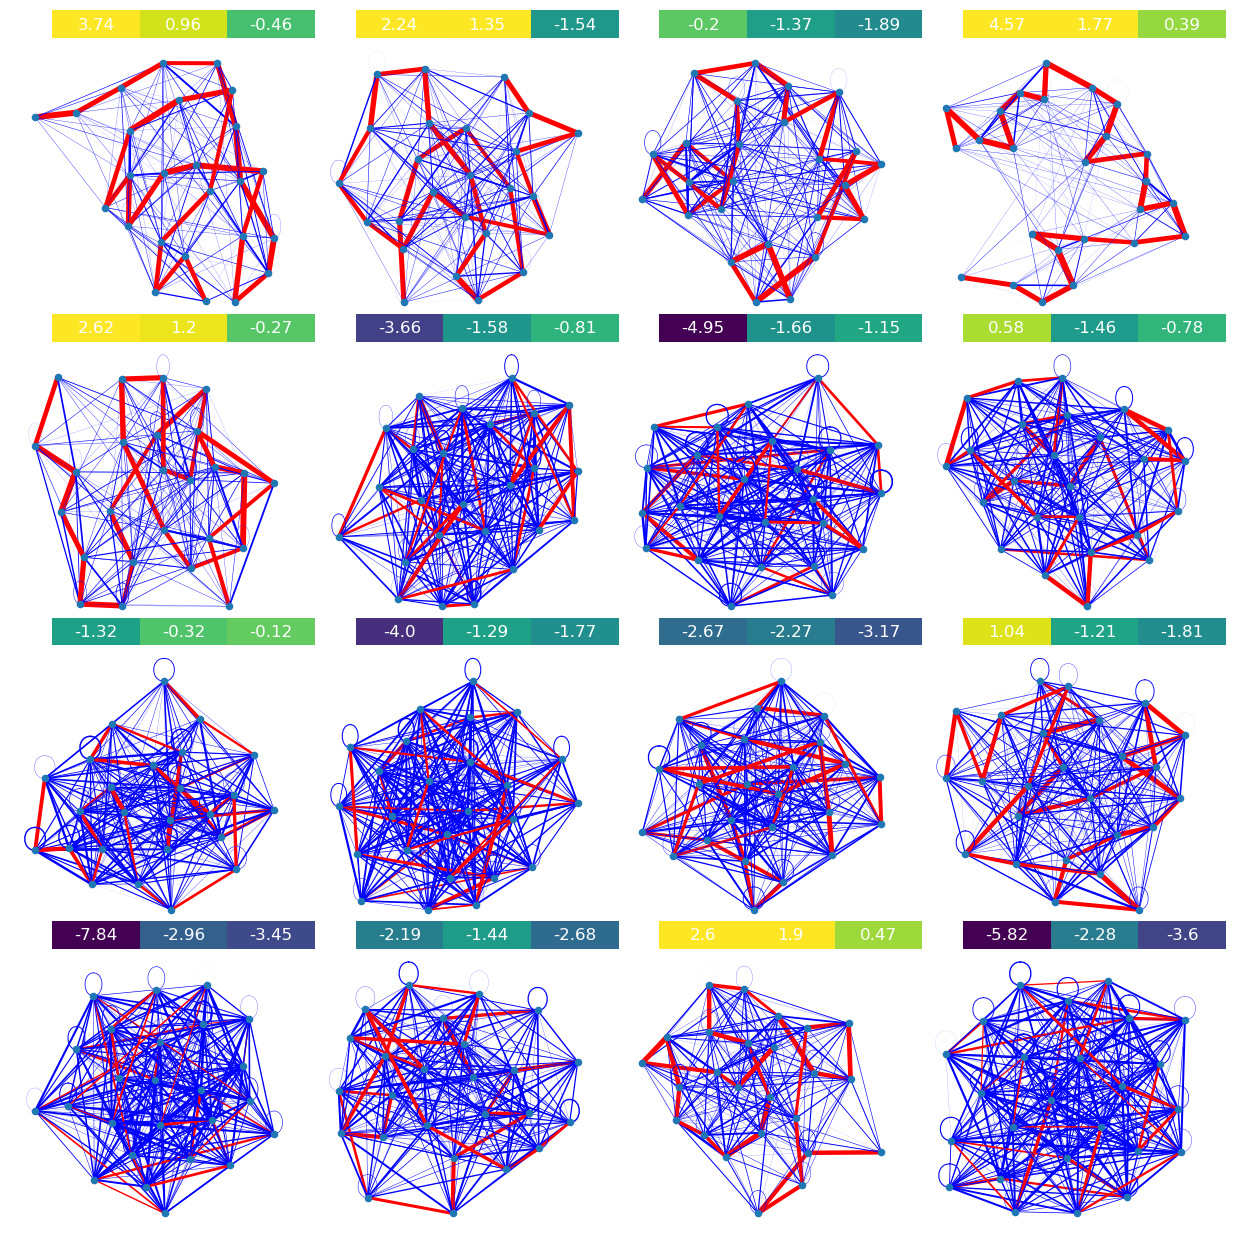

In [11]:
## Visualize dictionaries
display_dict_and_graph(save_path=f'output/figure/Caltech_UCLA_MIT_Harvard', W=W, regression_coeff=beta.T, fig_size=[15,15], plot_graph_only=True)

In [12]:
### Harvard1, MIT8, Caltech36, UCLA26, 'bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4'
path = "data/" + "Harvard1" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob_ = sndl_predict(G3, W, beta, 500)

prob = np.insert(prob_, 0, 1-np.sum(prob_))
print(f"The predicted probability distribution: \n{prob}")

The predicted probability distribution: 
[0.05464207 0.3435041  0.25944192 0.34241192]
